In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import sweetviz as sv 
from sklearn.ensemble import RandomForestClassifier


In [2]:
data =pd.read_csv("winequality.csv")

In [146]:
data.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5
10,6.7,0.580,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


Text(0.5, 1.0, 'Number counts with Duplicated ')

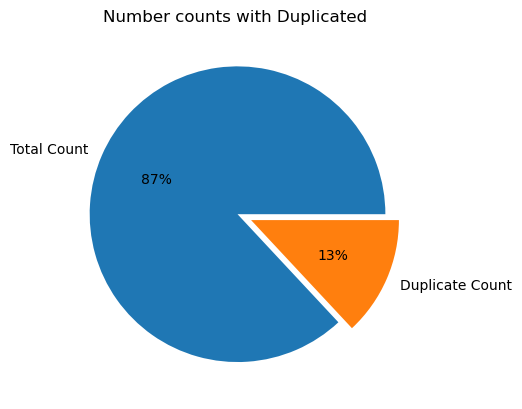

In [20]:
totalCount= data.shape[0]
duplicateCount = data.duplicated().sum()

plt.pie([totalCount,duplicateCount],labels=["Total Count","Duplicate Count"],autopct='%.0f%%',explode=[0,0.1])
plt.title("Number counts with Duplicated ")

In [21]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [22]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

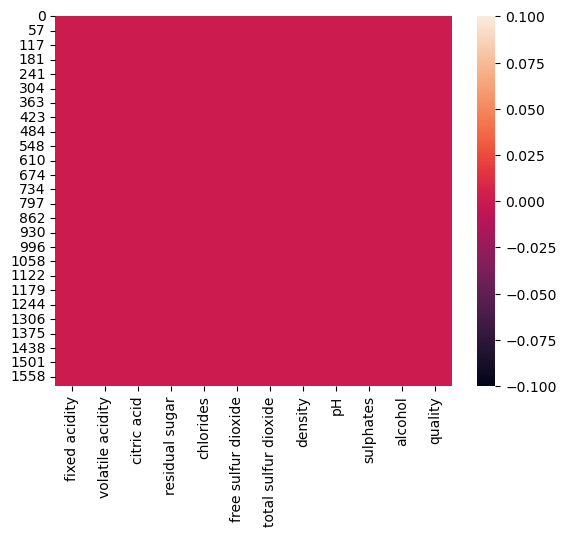

In [24]:
sns.heatmap(data.isnull())
plt.show()

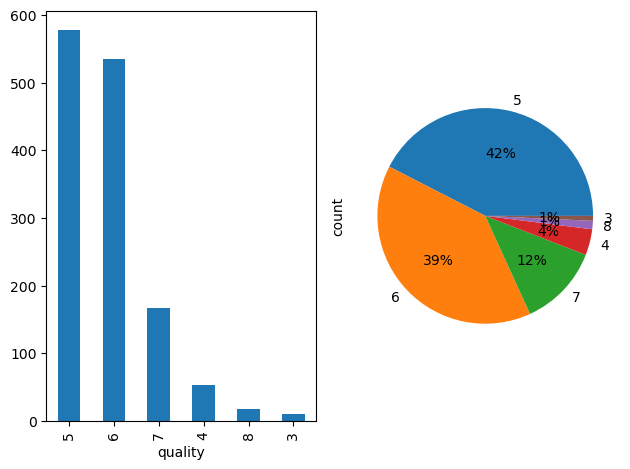

In [52]:
fig, (ax1, ax2) = plt.subplots(1, 2)
data["quality"].value_counts().plot(kind='bar',ax=ax1)
data["quality"].value_counts().plot(kind='pie',ax=ax2,autopct='%.0f%%')
plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

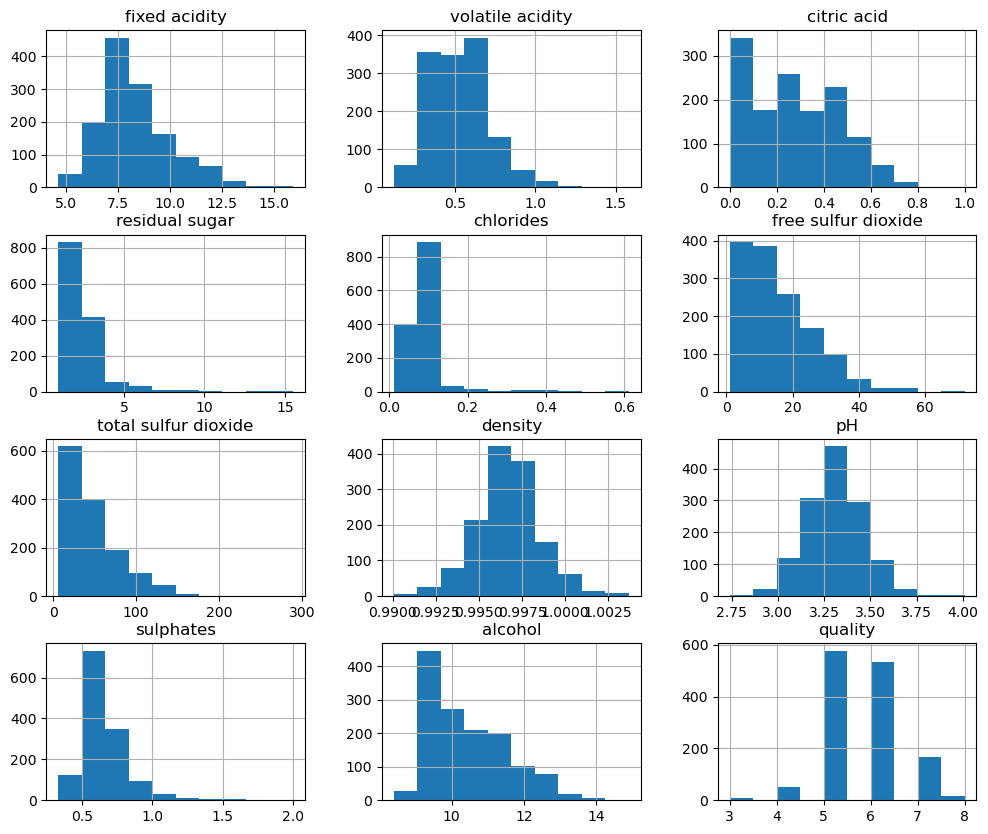

In [57]:
data.hist(figsize=(12,10))

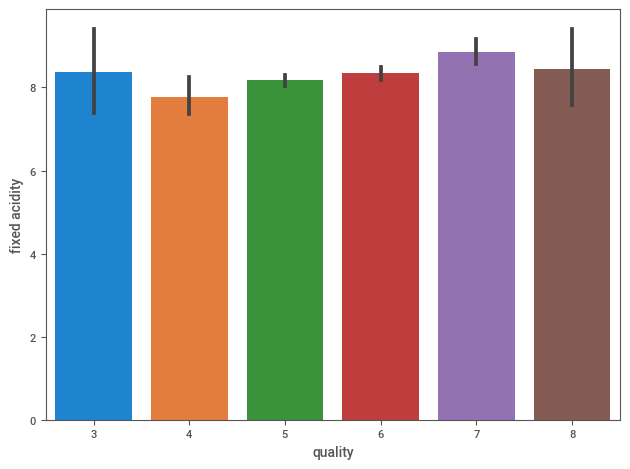

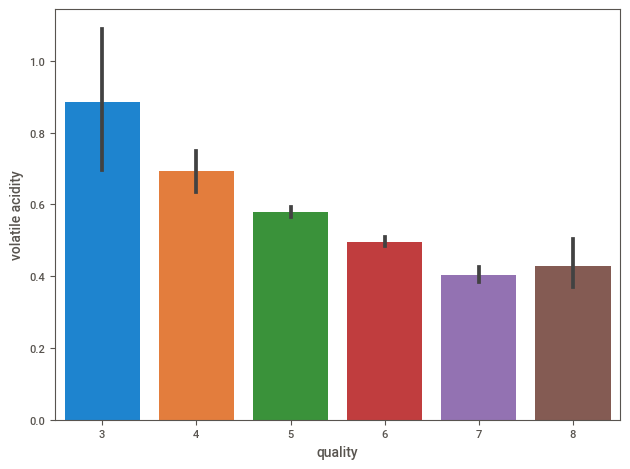

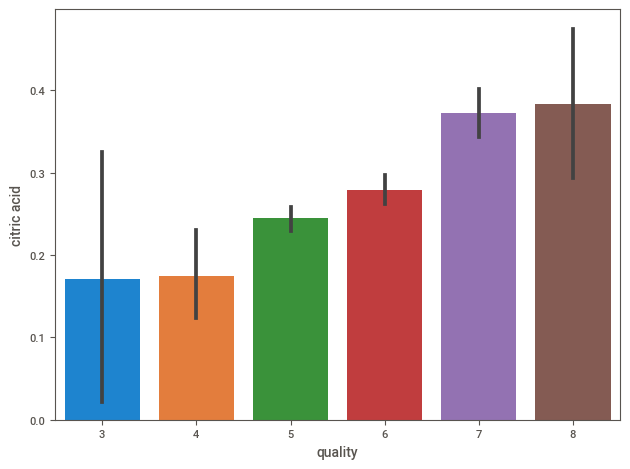

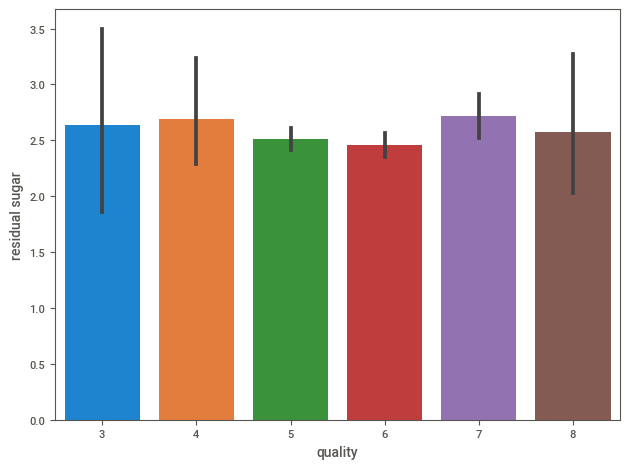

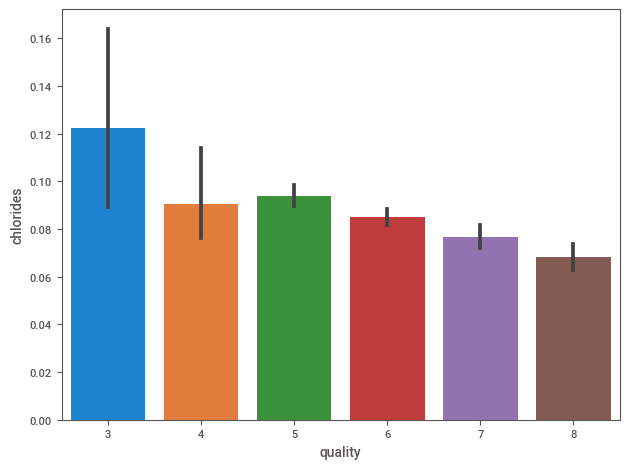

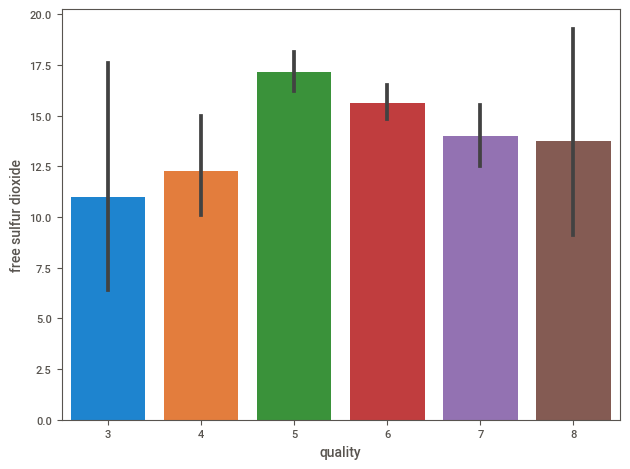

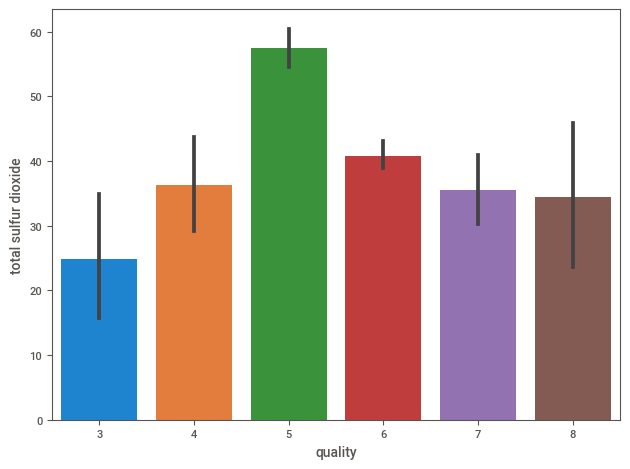

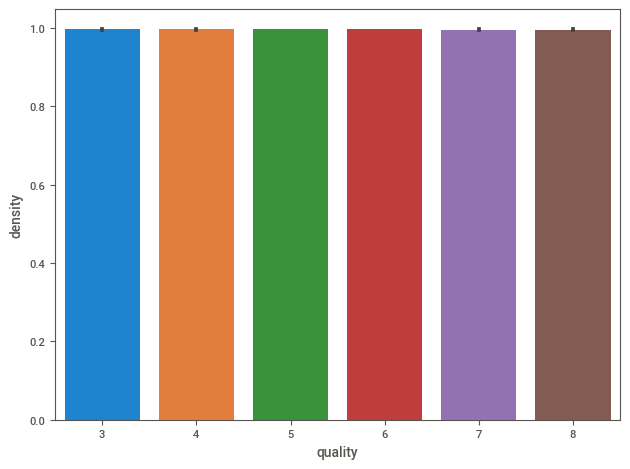

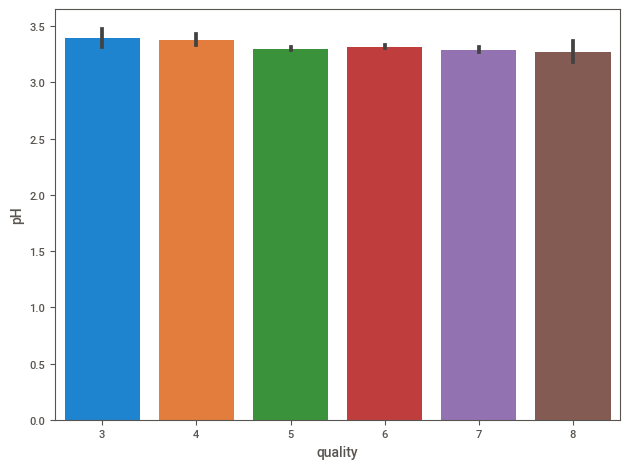

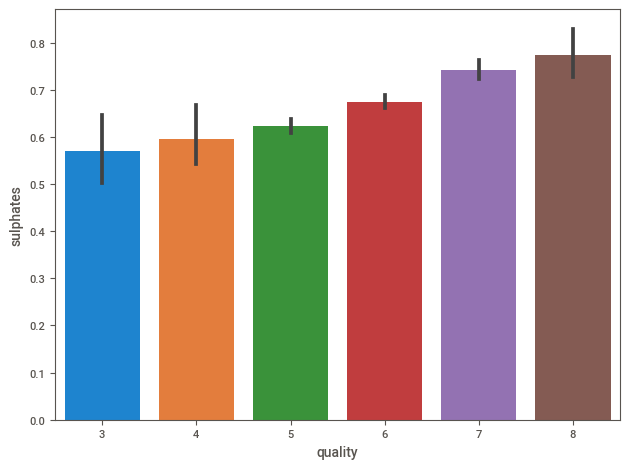

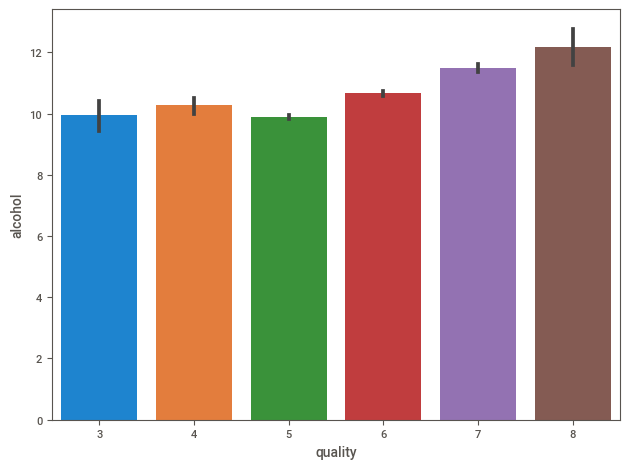

In [134]:
columnsV = (data.select_dtypes(include="float64").columns)
for idx,i in enumerate(columnsV):
    X = data["quality"]
    Y = data[i]  
    sns.barplot(x=X,y=Y,data=data)
    plt.tight_layout()
    plt.show()

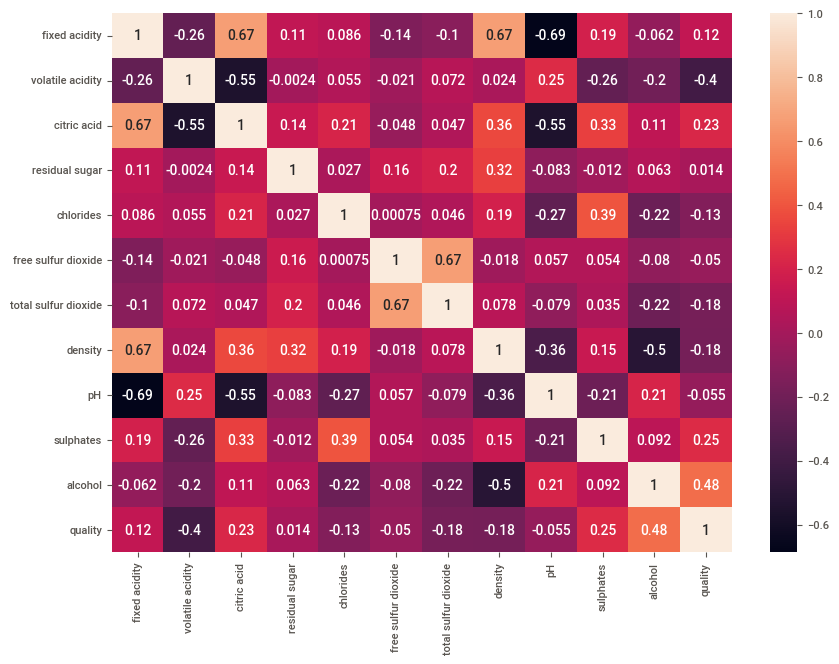

In [116]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [74]:
report = sv.analyze(data)

                                             |                                             | [  0%]   00:00 ->…

In [75]:
report.show_html("report.html")

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [53]:
X= data.drop(columns="quality",axis=1)
Y= data["quality"]

In [54]:
XTR,XTS,YTR,YTS = train_test_split(X,Y,test_size=0.2,random_state=2)

In [136]:
model = RandomForestClassifier()

In [138]:
model.fit(XTR,YTR)

RandomForestClassifier()

In [148]:
pr= model.predict(XTR)

In [142]:
model.score(XTR,YTR)*100

100.0

In [147]:
# making system

# input= (11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8)
input = (8.5,0.280,0.56,1.8,0.092,35.0,103.0,0.9969,3.30,0.75,10.5)
inputV = np.asarray(input).reshape(1,-1)
predict = model.predict(inputV)
print(predict)

[7]


C:\Users\10713310\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


<Axes: ylabel='quality'>

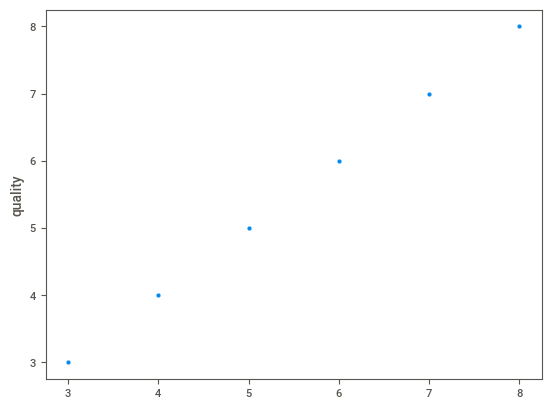

In [152]:
sns.scatterplot(x=pr,y=YTR)